<h1>How involved are ALCX users with NFTs?</h1>
Prepared by crypGOAT and Monet Capital 

<h2>Description</h2>

This project aims to investigate the degree to which Alchemix users are involved in the non-fungible token (NFT) space. All data for this project comes from Flipside's Velocity database, updated daily and accessible through the following queries: 

 - List of ALCX Holders: https://api.flipsidecrypto.com/api/v2/queries/b3f62df0-486a-42cb-8f77-3fee8f7b87b4/data/latest
 - List of ALCX Holders with NFTs: https://api.flipsidecrypto.com/api/v2/queries/b3f62df0-486a-42cb-8f77-3fee8f7b87b4/data/latest
 - Count of NFTs that ALCX Holders Own: https://api.flipsidecrypto.com/api/v2/queries/4ab4f8ff-f1db-4c7f-ac09-49bddc9fc513/data/latest 

<h2>Imports</h2>
Python Libraries

In [2]:
import requests as rq
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Import Datasets

In [3]:
#List of ALCX Holders
url = rq.get('https://api.flipsidecrypto.com/api/v2/queries/b3f62df0-486a-42cb-8f77-3fee8f7b87b4/data/latest')
raw_alcx_users = url.json()
alcx_users = pd.DataFrame(raw_alcx_users)

In [4]:
#List of ALCX Holders with NFTs
url = rq.get('https://api.flipsidecrypto.com/api/v2/queries/4ab4f8ff-f1db-4c7f-ac09-49bddc9fc513/data/latest')
raw_alcx_holders_with_nfts = url.json()
alcx_holders_with_nfts = pd.DataFrame(raw_alcx_holders_with_nfts)

In [20]:
#List of NFTs that ALCX Holders Own
url = rq.get('https://api.flipsidecrypto.com/api/v2/queries/c86d9c9c-f258-42e7-a17e-ee9f1fc38c12/data/latest')
raw_nft_counts = url.json()
nft_counts = pd.DataFrame(raw_nft_counts)
nft_counts_top_100=nft_counts.iloc[:100]

<h2>Q1: What proportion of wallets that hold ALCX also have an NFT?</h2>
Calculations

In [7]:
alcx_holders_with_nfts_count = len(list(set(alcx_holders_with_nfts['EVENT_TO'])))
alcx_count=(len(list(alcx_users['USER_ADDRESS'])))
count_dataframe = pd.DataFrame.from_dict({0:['Hold Both ALCX and NFTs', alcx_holders_with_nfts_count], 1:['Total ALCX Holders', alcx_count]},orient='index',columns=['Group','# of Holders'])
proportion = round(alcx_holders_with_nfts_count/alcx_count*100, 2)

Charting

Text(0.5, -2209.5, '% of ALCX holders with NFTs: 16.88%')

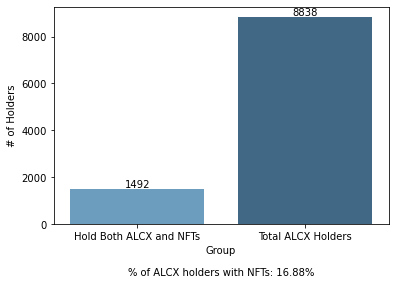

In [19]:
chart = sns.barplot(x=count_dataframe['Group'], y=count_dataframe['# of Holders'], data=count_dataframe, palette='Blues_d')
for p in chart.patches:
    chart.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
    textcoords='offset points')

y_offset=-max(count_dataframe['# of Holders'])/4

chart.text(x=0.5,y=y_offset,s='% of ALCX holders with NFTs: ' + str(proportion) + '%',horizontalalignment='center')

<h2>Q2: Of the NFTs that ALCX users hold, which are the most popular?</h2>
Charting

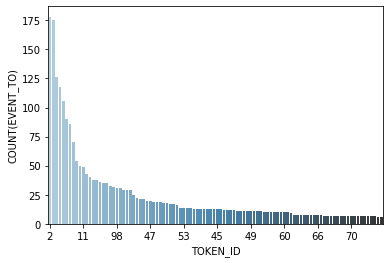

In [21]:
counts_chart = sns.barplot(x=nft_counts_top_100['TOKEN_ID'], y=nft_counts_top_100['COUNT(EVENT_TO)'], data=nft_counts_top_100, palette='Blues_d')
counts_chart.xaxis.set_major_locator(ticker.MultipleLocator(10))